<a href="https://colab.research.google.com/github/Prayag79/Deep-learning/blob/main/central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mustafaali96/weight-height")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/weight-height


In [5]:
df = pd.read_csv(path + "/weight-height.csv")

In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


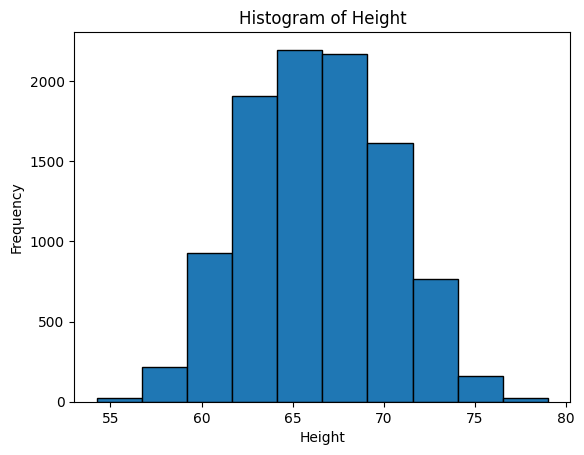

In [16]:
plt.hist(df['Height'], bins=10, edgecolor='black')
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Histogram of Height")
plt.show()


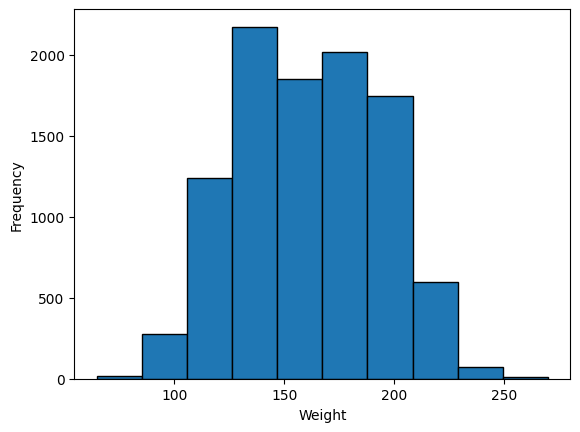

In [19]:
plt.hist(df['Weight'] ,bins = 10 , edgecolor = 'black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Both follows approximately a gaussian distribution

In [23]:
population = df['Height']
sample_sizes = [5,10,50,75,100]
num_samples = 100

results = {}

for n in sample_sizes:
    sample_means = []
    for _ in range(num_samples):
        sample = population.sample(n, replace=True)
        sample_means.append(sample.mean())
    results[n] = sample_means

means_df = pd.DataFrame(results)
print(means_df.describe())

              5           10          50          75          100
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    66.538491   66.397217   66.370708   66.329535   66.355672
std      1.639141    1.214902    0.530263    0.406024    0.385256
min     62.877883   62.814090   65.185605   65.307608   65.321527
25%     65.336430   65.788731   66.019613   66.019786   66.108064
50%     66.628929   66.355635   66.325159   66.296763   66.364872
75%     67.773481   67.158973   66.720482   66.580084   66.569740
max     69.654747   70.449907   67.743792   67.326370   67.142210


# clearly the spread ( std var ) decrease as we increase sample sizes .

In [25]:
population = df['Height']
pop_mean = population.mean()
pop_std = population.std()

print("Population mean:", pop_mean)
print("Population std:", pop_std)


Population mean: 66.36755975482124
Population std: 3.8475281207732324


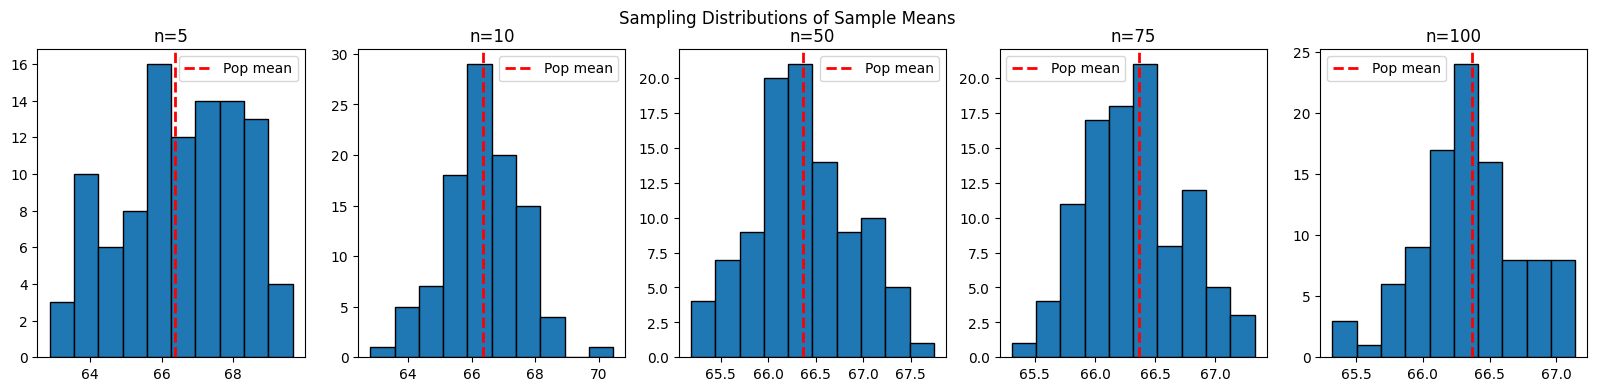

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(means_df.columns), figsize=(20, 4))

for i, n in enumerate(means_df.columns):
    axes[i].hist(means_df[n], bins=10, edgecolor='black')
    axes[i].axvline(population.mean(), color='red', linestyle='dashed', linewidth=2, label='Pop mean')
    axes[i].set_title(f"n={n}")
    axes[i].legend()

plt.suptitle("Sampling Distributions of Sample Means")
plt.show()


In [27]:
pop_mean = population.mean()
pop_std = population.std()

for n in means_df.columns:
    print(f"\nSample size n={n}")
    print(f"Mean of sample means      : {means_df[n].mean():.2f}")
    print(f"Std of sample means       : {means_df[n].std():.2f}")
    print(f"Population mean           : {pop_mean:.2f}")
    print(f"Population std / sqrt(n)  : {pop_std/np.sqrt(n):.2f}")



Sample size n=5
Mean of sample means      : 66.54
Std of sample means       : 1.64
Population mean           : 66.37
Population std / sqrt(n)  : 1.72

Sample size n=10
Mean of sample means      : 66.40
Std of sample means       : 1.21
Population mean           : 66.37
Population std / sqrt(n)  : 1.22

Sample size n=50
Mean of sample means      : 66.37
Std of sample means       : 0.53
Population mean           : 66.37
Population std / sqrt(n)  : 0.54

Sample size n=75
Mean of sample means      : 66.33
Std of sample means       : 0.41
Population mean           : 66.37
Population std / sqrt(n)  : 0.44

Sample size n=100
Mean of sample means      : 66.36
Std of sample means       : 0.39
Population mean           : 66.37
Population std / sqrt(n)  : 0.38


In [ ]:
'''#Interpretation :

1. Shape of the sampling distribution (Central Limit Theorem):


When the sample size n is small (e.g., n = 5), the histogram of the 100 sample means is more spread out and may look irregular or skewed.


As n increases (10 → 30 → 50 → 100), the histogram becomes more symmetric and bell shaped, approaching a Normal distribution, even if the original population is not perfectly normal.




2.Sample mean vs Population mean


The mean of the sample means (from each n) is very close to the population mean.


This shows that the sample mean is an unbiased estimator of the population mean.


Even with small n, the average of many sample means is roughly equal to the population mean, but variability is larger.


3.The spread (standard deviation) of the sample means decreases as n increases.

This matches the formula for standard error: (sigma)/root(n)

Observations from your results:

Small n → larger spread, more variability in sample means.
Large n → smaller spread, sample means cluster tightly around the population mean.
This demonstrates that larger samples give more precise estimates of the population mean.


4.  CLT in action: The distribution of sample means becomes normal as n grows.


Accuracy improves with n: Sample mean converges to population mean.


Precision improves with n: Standard deviation of sample means decreases as sample size increases.